In [3]:
# load thư viện và dữ liệu
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# kiểm tra số mẫu dữ liệu
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


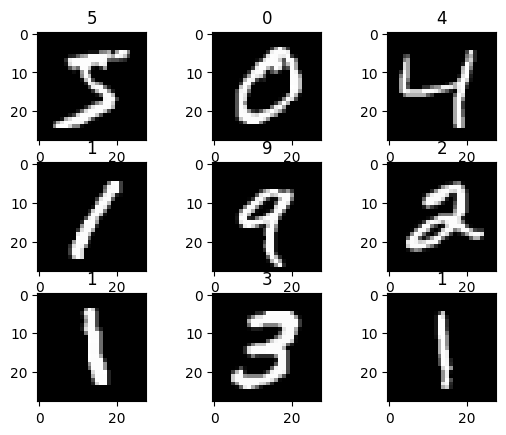

In [5]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(str(y_train[i]))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [6]:
# chuyển dữ liệu y_train từ label sang encode
# chuyển dữ liệu x_train về khoảng 0 và 1
from tensorflow.keras.utils import to_categorical
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:9])


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
#định nghĩa hàm loss
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# định nghĩa thuật toán tối ưu
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# xây dựng mô hình
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])
    model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
    return model


In [9]:
# tạo mô hình và in ra bảng tổng kết
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [10]:
# xây dựng hàm lưu lại mô hình dựa theo loss của tập validation
weights_filepath = './weights/'
callback = tf.keras.callbacks.ModelCheckpoint(filepath=weights_filepath, monitor='val_loss', verbose=1,
                                              save_best_only=False, save_weights_only=False)
# bắt đầu training
his = model.fit(x_train, y_train, epochs=50, batch_size=128,
                validation_split=0.2, callbacks=callback)


Epoch 1/50
364/375 [============================>.] - ETA: 0s - loss: 1.5469 - accuracy: 0.5967
Epoch 1: saving model to ./weights\
INFO:tensorflow:Assets written to: ./weights\assets
375/375 [==============================] - 3s 5ms/step - loss: 1.5239 - accuracy: 0.6029 - val_loss: 0.7157 - val_accuracy: 0.8332
Epoch 2/50
361/375 [===========================>..] - ETA: 0s - loss: 0.5575 - accuracy: 0.8535
Epoch 2: saving model to ./weights\
INFO:tensorflow:Assets written to: ./weights\assets
375/375 [==============================] - 2s 6ms/step - loss: 0.5553 - accuracy: 0.8538 - val_loss: 0.4252 - val_accuracy: 0.8836
Epoch 3/50
374/375 [============================>.] - ETA: 0s - loss: 0.4060 - accuracy: 0.8857
Epoch 3: saving model to ./weights\
INFO:tensorflow:Assets written to: ./weights\assets
375/375 [==============================] - 2s 5ms/step - loss: 0.4057 - accuracy: 0.8857 - val_loss: 0.3544 - val_accuracy: 0.8997
Epoch 4/50
362/375 [===========================>..] - E

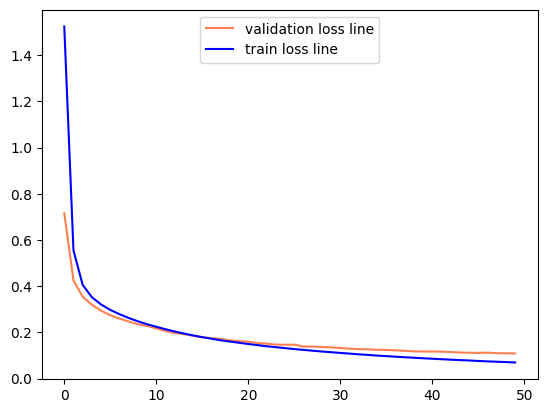

In [11]:
# vẽ đường loss trên tập train và tập validation
plt.plot(his.history['val_loss'], c='coral', label='validation loss line')
plt.plot(his.history['loss'], c='blue', label='train loss line')
legend = plt.legend(loc='upper center')
plt.show()


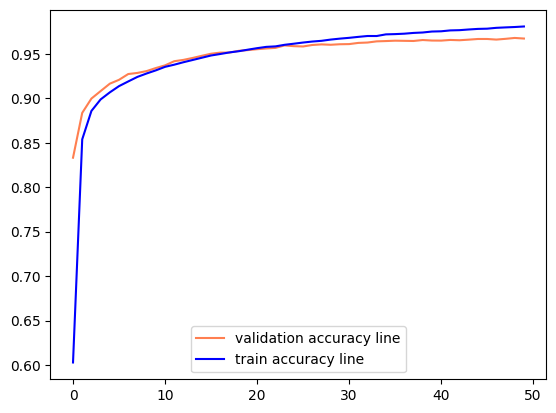

In [13]:
# vẽ đường accuracy trên tập train và tập validation
plt.plot(his.history['val_accuracy'], c='coral', label= 'validation accuracy line')
plt.plot(his.history['accuracy'], c='blue', label='train accuracy line')
legend = plt.legend(loc='lower center')
plt.show()


In [14]:
# Load file mô hình đã huấn luyện
model = create_model()
model = tf.keras.models.load_model('./weights/')
# Đánh giá mô hình trên tập test
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('loss tập test = ', loss,'| accuracy tập test = ', acc)

loss tập test =  0.09998805075883865 | accuracy tập test =  0.9704999923706055


shape của 1 bức ảnh (28, 28)
shape phù hợp với mô hình là 3 chiều (1, 28, 28)
1/1 [==============================] - 0s 85ms/step
số dự đoán là : 9


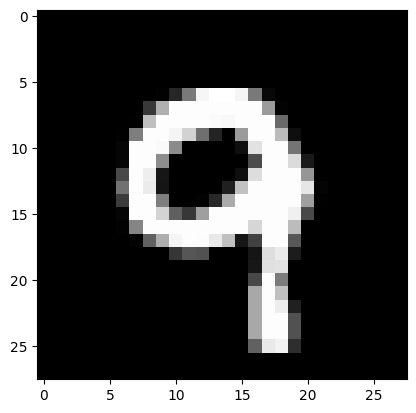

In [15]:
# lấy 1 hình ảnh bất kỳ ở tập test và dự đoán
import numpy as np
input_image = x_test[99]
plt.imshow(input_image, cmap=plt.get_cmap('gray'))
print('shape của 1 bức ảnh', input_image.shape)
input_image = np.expand_dims(input_image, axis=0)
print('shape phù hợp với mô hình là 3 chiều', input_image.shape)
output = model.predict(input_image)
print('số dự đoán là :', output.argmax())
